In [ ]:
##### Fig. 1 - Phoneme and prosody identification tasks and behavioural results
#
# written by S-C. Baek
# updated date: 16.12.2024
#

In [1]:
# import packages
import os

import scipy.io
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# path settings
FIGDIR  = os.getcwd()
MAINDIR = os.path.abspath('..')
DATADIR = MAINDIR + os.sep + 'data/'

In [3]:
# subjects
s = os.listdir(DATADIR)
subjects = [i for i in s if 'sub-' in i]
subjects.sort()
n_subjects = len(subjects)

In [4]:
# tasks
tasks = ('phoneme', 'prosody')
n_tasks = len(tasks)

In [ ]:
# Fig. 1c,d - fitted sigmoids for phonemes (c) and prosody (d)

In [5]:
# init matrices to fetch data and conditions for testing
alpha  = np.zeros( (n_tasks, n_subjects) )
slope  = np.zeros( (n_tasks, n_subjects) )

# loop over tasks
for ti, task in enumerate(tasks):
    
    # loop over subjects
    for subi, subject in enumerate(subjects):
        
        # import the sigmidal fit to individual behavioral responses
        mfile = DATADIR + subject + os.sep + 'behavior' + os.sep + 'task_fit_' + task + '.mat'
        mat = scipy.io.loadmat(mfile)
        query = [key for key in mat.keys() if '__' not in key][0]
        data = mat[query][0,0]

        # the following is the information about the structure
        # | 0: x (morph levels) | 1: y (observed proportions) | 2: lin_fit | 3: sig_fit |
        #
        # 2: lin_fit (need to peel 2 dims) -> | 2000: intercept | 2001: slope | 2002: rsq | 2003: adjrsq |
        # 3: sig_fit (need to peel 2 dims) -> | 3000: 50%-pnt   | 3001: slope | 3002: rsq | 3003: adjrsq |
        alpha[ti, subi] = data[3][0][0][0]
        slope[ti, subi] = data[3][0][0][1]

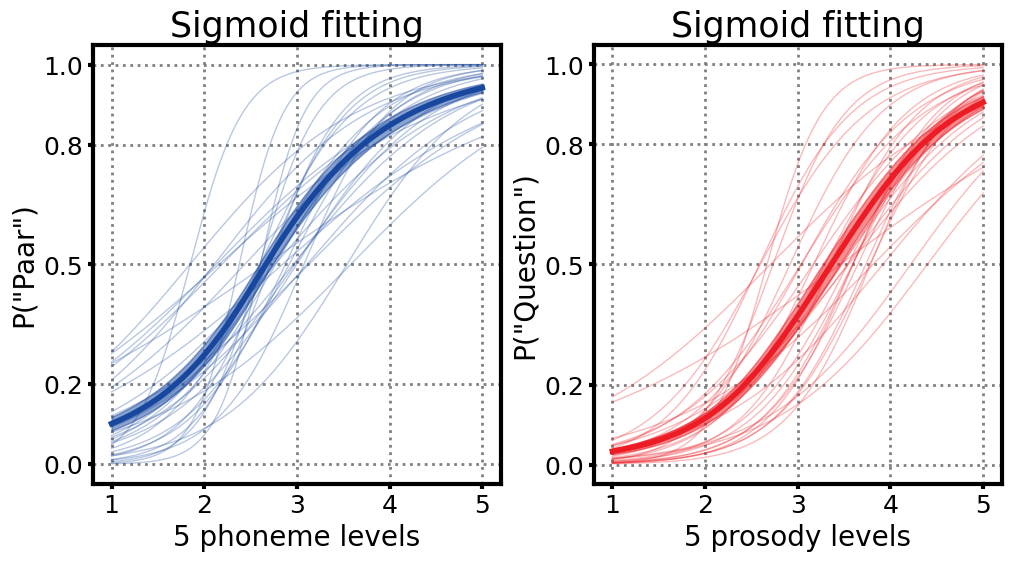

In [6]:
# figure
fig, ax = plt.subplots(1,2, sharex=True, figsize=(10, 5.5), constrained_layout=True)

# figure settings
xticks = np.arange(1,6)
yticks = np.array([0.0, 0.2, 0.5, 0.8, 1.0])

# colors
colors = ['#17479e', '#ed1c24'] # blueish & redish

# xfit
xfit = np.linspace(xticks[0], xticks[-1], 401)

# loop over indices
for ti in range(len(tasks)):
    
    # ---------- fitted sigmoids ---------- #
    # init to store yfit
    yfit = np.zeros( (len(xfit), n_subjects) )
    
    # loop over subjects
    for subi in range(n_subjects):
        a = alpha[ti, subi]
        b = slope[ti, subi]
        yfit[:, subi] = 1 / ( 1 + np.exp( (a-xfit) * b ) )
        del a, b
        
    # data to plot
    m     = np.mean(yfit, axis=-1)
    sem   = np.std(yfit, axis=-1) / np.sqrt(n_subjects)
    upper = m + sem
    lower = m - sem
    
    # plotting
    ax[ti].plot(xfit, yfit, color=colors[ti], linewidth=1.0, alpha=0.3) # individual fits
    ax[ti].fill_between(xfit, upper, lower, color=colors[ti], alpha=0.5) # s.e.m
    ax[ti].plot(xfit, m, linewidth=4., color=colors[ti]) # mean

    # accessories
    ax[ti].set_xlabel("5 phoneme levels" if ti == 0 else "5 prosody levels", fontsize=20)
    ax[ti].set_ylabel('P("Paar")' if ti == 0 else 'P("Question")', fontsize=20)
    ax[ti].tick_params(axis='x', labelsize=18)
    ax[ti].xaxis.set_tick_params(width=3)
    ax[ti].set_yticks(yticks)
    ax[ti].tick_params(axis='y', labelsize=18)
    ax[ti].yaxis.set_tick_params(width=3)
    ax[ti].grid(color='gray', linestyle='dotted', linewidth=2.0)
    ax[ti].set_axisbelow(True)
    for axis in ['top','bottom','left','right']:
        ax[ti].spines[axis].set_linewidth(3)
    ax[ti].set_title('Sigmoid fitting', fontsize=25)

In [ ]:
# Fig. 1e - linear vs. sigmoid fitting

In [7]:
# init matrices to fetch data and conditions for testing
lingof = np.zeros( (n_tasks, n_subjects) )
siggof = np.zeros( (n_tasks, n_subjects) )

# loop over tasks
for ti, task in enumerate(tasks):
    
    # loop over subjects
    for subi, subject in enumerate(subjects):
        
        # import the sigmidal fit to individual behavioral responses
        mfile = DATADIR + subject + os.sep + 'behavior' + os.sep + 'task_fit_' + task + '.mat'
        mat = scipy.io.loadmat(mfile)
        query = [key for key in mat.keys() if '__' not in key][0]
        data = mat[query][0,0]

        # the following is the information about the structure
        # | 0: x (morph levels) | 1: y (observed proportions) | 2: lin_fit | 3: sig_fit |
        #
        # 2: lin_fit (need to peel 2 dims) -> | 2000: intercept | 2001: slope | 2002: rsq | 2003: adjrsq |
        # 3: sig_fit (need to peel 2 dims) -> | 3000: 50%-pnt   | 3001: slope | 3002: rsq | 3003: adjrsq |
        lingof[ti, subi] = data[2][0][0][3]
        siggof[ti, subi] = data[3][0][0][3]

Text(0.5, 1.0, 'Linear vs. Sigmoid fit')

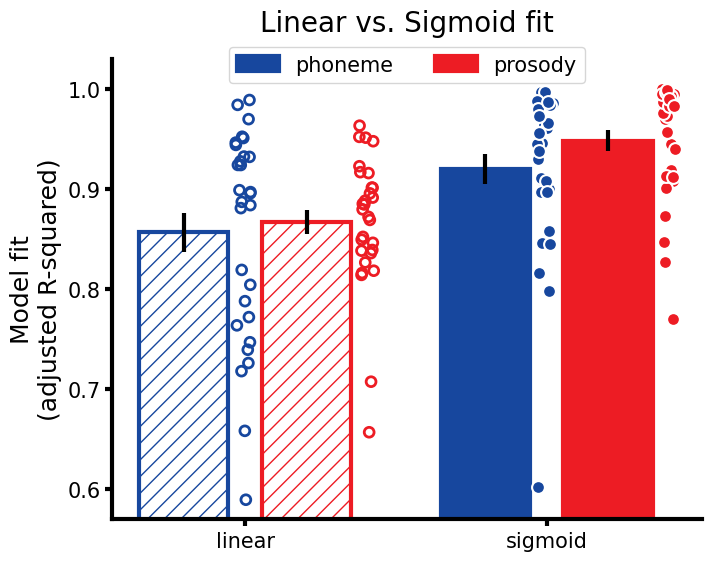

In [8]:
# figure for bar plot
fig, ax = plt.subplots(figsize=(7,5.5), layout='constrained')

# colors
colors = ['#17479e', '#ed1c24'] # blueish & redish

# individual data
data = [lingof[0,:], lingof[1,:], siggof[0,:], siggof[1,:]]

# random seed for plotting individual data
np.random.seed(1333)

# loop over data
xticks = list()
for i in range(len(data)):

    # mean & error
    m = np.mean(data[i]) # group mean
    sem = np.std(data[i]) / np.sqrt(n_subjects)

    # barplot
    x = i*1.1
    x+= 0 if i < 2 else 0.5
    xticks.append(x)
    linewidth = 3.0
    if i > 1:
        edgecolor = colors[0] if not i % 2 else colors[1]
        facecolor = colors[0] if not i % 2 else colors[1]
        hatch = None
    else:
        edgecolor = colors[0] if not i % 2 else colors[1]
        facecolor = 'none'
        hatch = '//'
    if i > 1:
        label = 'prosody' if i % 2 else 'phoneme'
    else:
        label = None
    ax.bar(x, m, linewidth=linewidth, edgecolor=edgecolor, facecolor=facecolor, label=label, hatch=hatch)
    ax.errorbar(x, m, sem, color='k', elinewidth=3.0)
    
    # individual data points
    xs = x + 0.5 + (np.random.rand(n_subjects)-0.25)/7
    if facecolor == 'none':
        ax.scatter(xs, data[i], s=50, facecolor=facecolor, edgecolors=edgecolor, linewidth=2)
    else:
        ax.scatter(xs, data[i], s=85, facecolor=facecolor, edgecolors='w', linewidth=1.5)

# accessories
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=15)
xlim = np.array(ax.get_xlim())
ax.set_xticks([(xticks[0]+xticks[1])/2, (xticks[2]+xticks[3])/2])
ax.set_xticklabels(['linear', 'sigmoid'])
ax.tick_params(axis='x', labelsize=15)
ax.set_ylabel('Model fit\n(adjusted R-squared)', fontsize=18)
ax.set_ylim(0.57, 1.03)
ax.set_yticks(np.linspace(0.6, 1.0, 5))
ax.tick_params(axis='y', labelsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.xaxis.set_tick_params(length=5, width=3)
ax.yaxis.set_tick_params(length=5, width=3)
ax.set_title('Linear vs. Sigmoid fit', fontsize=20, pad=20)